# Prepare data for Plots for 'Data over the Kamb channel'

## Plan

1. overview map
2. REMA splodge
3. ApRES plot
3. icesat2 dots
4. a. Icesat2 crosssection lower
4. b. Icesat2 crosssection raise
5. a. Icesat1 and REMA crossections
5. b. other icesat1 and REMA


study are "x > -382064.5722209641 & x < -374781.1654740692 & y > -734075.0820404041 & y < -722764.4514729496"

In [2]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point, LineString, box
import hvplot.xarray  # noqa
import cartopy.crs as crs
import hvplot.pandas
import tarfile

In [3]:
modis_moa_zipped_path = '/Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0593_moa2009/geotiff/moa125_2009_hp1_v01.1.tif.gz'


## Unzip modis moa tiff

## Crop modis moa to study area'
- -580049.4,-868940.0 : -124047.0,-537790.1 quite large
- -402500 -750000, -339600 -712900 medium

In [4]:
#just close around the channel
#!gdal_translate -projwin -382064.0 -722764.0 -374781.0 -734075.0 -of GTiff /vsigzip//Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0593_moa2009/geotiff/moa125_2009_hp1_v01.1.tif.gz /Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/moa_field_area.tif

In [ ]:
-580049.4,-868940.0 : -124047.0,-537790.1 quite large
-402500 -750000 -339600 -712900 medium


In [23]:
#slightly larger area
!gdal_translate -projwin -402500 -712900 -339600 -750000 -of GTiff /vsigzip//Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/daacdata.apps.nsidc.org/pub/DATASETS/nsidc0593_moa2009/geotiff/moa125_2009_hp1_v01.1.tif.gz /Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/moa_mediumlarge_field_area.tif

Input file size is 48333, 41779
0...10...20...30...40...50...60...70...80...90...100 - done.


In [6]:
moa_cropped_path = '/Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/moa_field_area.tif'

with rio.open(moa_cropped_path) as image:
    extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im = image.read(1)

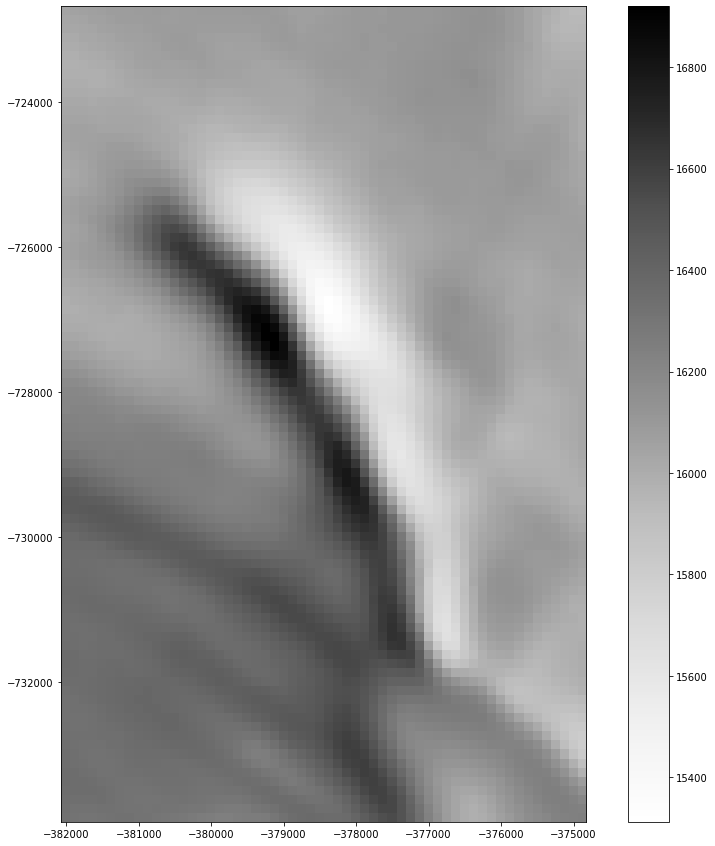

In [17]:
#plt.imshow(im,extent=extent, vmin=v[0],vmax=v[1])
plt.figure(figsize=[15,15])
plt.imshow(im,extent=extent,cmap='Greys')
plt.colorbar()

In [29]:
moa_cropped_path = '/Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/moa_mediumlarge_field_area.tif'

with rio.open(moa_cropped_path) as image:
    extent2 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im2 = image.read(1)

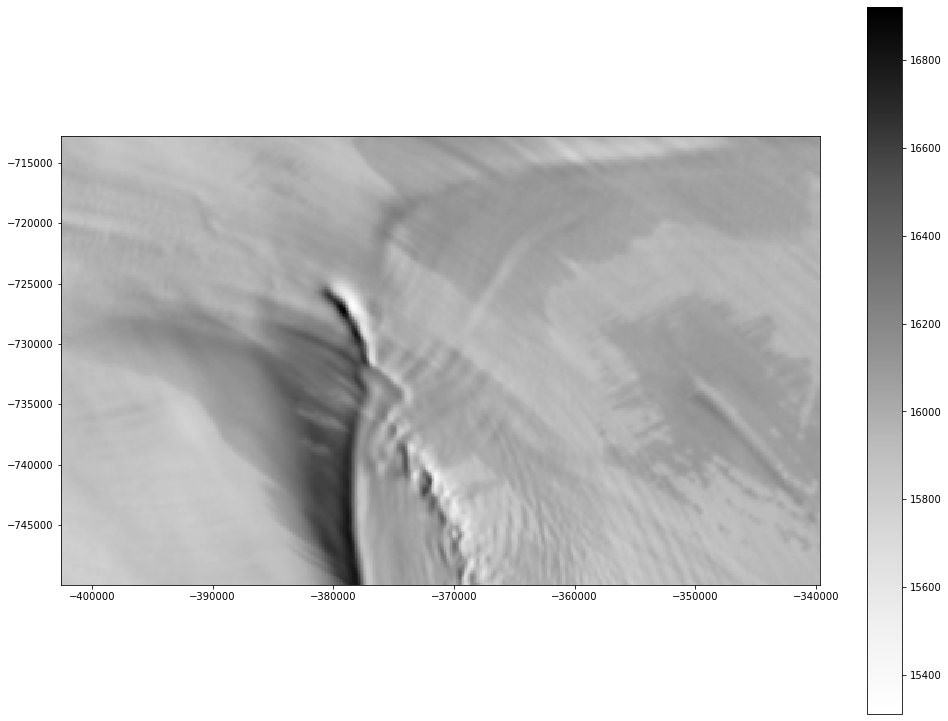

In [27]:
#plt.imshow(im,extent=extent, vmin=v[0],vmax=v[1])
plt.figure(figsize=[17,13])
plt.imshow(im2,extent=extent2,cmap='Greys')
plt.colorbar()
plt.show()

-7250.0

-11250.0

In [21]:
extent

[-382075.0, -374825.0, -733925.0, -722675.0]